# Importing LIbraries

In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading DataSet

In [339]:
df = pd.read_csv("preprocessing data.csv")
df

,A,B,C,D,E,F,G,H
0,23.0,8000.0,1.1,23.0,555.0,Red,Yes,Male
1,32.0,5000.0,2.1,26.0,NaN,Blue,No,Male
2,NaN,6000.0,NaN,125.0,NaN,Black,Yes,NaN
3,54.0,70000.0,NaN,140.0,NaN,Red,NaN,NaN
4,64.0,6500.0,3.6,24.0,574.0,NaN,No,Male
5,46.0,NaN,2.5,NaN,556.0,Red,NaN,Female
6,NaN,NaN,NaN,NaN,545.0,Blue,NaN,Male
7,53.0,4500.0,NaN,NaN,586.0,Red,Yes,NaN
8,NaN,NaN,4.2,26.0,NaN,Black,Yes,Male
9,24.0,3200.0,2.3,25.0,546.0,NaN,NaN,NaN


In [340]:
df.shape

(10, 8)

In [341]:
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype='object')

# Basic Information of dataset

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       7 non-null      float64
 1   B       7 non-null      float64
 2   C       6 non-null      float64
 3   D       7 non-null      float64
 4   E       6 non-null      float64
 5   F       8 non-null      object 
 6   G       6 non-null      object 
 7   H       6 non-null      object 
dtypes: float64(5), object(3)
memory usage: 772.0+ bytes


In [343]:
df.count()

A    7
B    7
C    6
D    7
E    6
F    8
G    6
H    6
dtype: int64

# Checking For NULL values

In [344]:
df.isnull().sum()

A    3
B    3
C    4
D    3
E    4
F    2
G    4
H    4
dtype: int64

# Replacing the null values based on different factors
 - Replacing Categorical values with Mode
 - Numerical columns with MEAN if there are no outliers
 - With Median value in the presence of Outliers

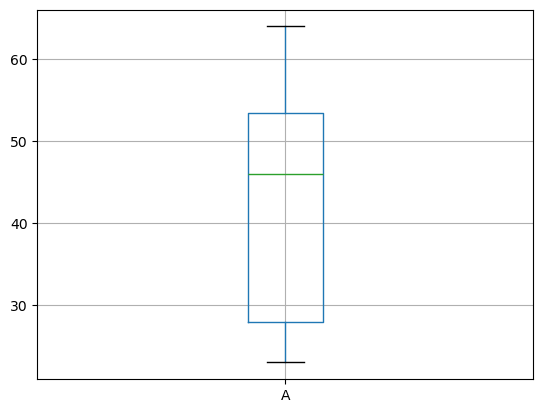

In [345]:
df.boxplot(column=['A'])
plt.show()

- no outliers detected so replacing the null values with mean

In [346]:
a=round(df["A"].mean(),1)

In [347]:
df['A']=df["A"].fillna(a)
df.head()

,A,B,C,D,E,F,G,H
0,23.0,8000.0,1.1,23.0,555.0,Red,Yes,Male
1,32.0,5000.0,2.1,26.0,NaN,Blue,No,Male
2,42.3,6000.0,NaN,125.0,NaN,Black,Yes,NaN
3,54.0,70000.0,NaN,140.0,NaN,Red,NaN,NaN
4,64.0,6500.0,3.6,24.0,574.0,NaN,No,Male


In [348]:
df.isnull().sum()

A    0
B    3
C    4
D    3
E    4
F    2
G    4
H    4
dtype: int64

In [349]:
df.describe()

,A,B,C,D,E
count,10.000000,7.000000,6.000000,7.000000,6.000000
mean,42.290000,14742.857143,2.633333,55.571429,560.333333
std,13.120929,24414.057231,1.109354,52.741057,16.329932
min,23.000000,3200.000000,1.100000,23.000000,545.000000
25%,34.575000,4750.000000,2.150000,24.500000,548.250000
50%,42.300000,6000.000000,2.400000,26.000000,555.500000
75%,51.250000,7250.000000,3.325000,75.500000,569.500000
max,64.000000,70000.000000,4.200000,140.000000,586.000000


- replacing the null values using random imputaion

In [350]:
df["B"].isnull().sum()

3

In [351]:
sample = df["B"].dropna().sample(3,random_state=10)
sample

2    6000.0
9    3200.0
0    8000.0
Name: B, dtype: float64

In [352]:
sample.index = df[df["B"].isnull()].index

In [353]:
df["B"] = round(df["B"].fillna(sample),2)
df["B"]

0     8000.0
1     5000.0
2     6000.0
3    70000.0
4     6500.0
5     6000.0
6     3200.0
7     4500.0
8     8000.0
9     3200.0
Name: B, dtype: float64

In [354]:
df

,A,B,C,D,E,F,G,H
0,23.0,8000.0,1.1,23.0,555.0,Red,Yes,Male
1,32.0,5000.0,2.1,26.0,NaN,Blue,No,Male
2,42.3,6000.0,NaN,125.0,NaN,Black,Yes,NaN
3,54.0,70000.0,NaN,140.0,NaN,Red,NaN,NaN
4,64.0,6500.0,3.6,24.0,574.0,NaN,No,Male
5,46.0,6000.0,2.5,NaN,556.0,Red,NaN,Female
6,42.3,3200.0,NaN,NaN,545.0,Blue,NaN,Male
7,53.0,4500.0,NaN,NaN,586.0,Red,Yes,NaN
8,42.3,8000.0,4.2,26.0,NaN,Black,Yes,Male
9,24.0,3200.0,2.3,25.0,546.0,NaN,NaN,NaN


- replacing null values with mean

In [355]:
df["C"].isnull().sum()

4

In [356]:
df['C'].dropna().mean()

2.6333333333333333

In [357]:
df["C"].fillna(df["C"].mean(),inplace=True)
df["C"]

0    1.100000
1    2.100000
2    2.633333
3    2.633333
4    3.600000
5    2.500000
6    2.633333
7    2.633333
8    4.200000
9    2.300000
Name: C, dtype: float64

## Categorical Values

In [358]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
E    float64
F     object
G     object
H     object
dtype: object

- F,G,H columns are catogrical

In [359]:
df[["F","G","H"]]

,F,G,H
0,Red,Yes,Male
1,Blue,No,Male
2,Black,Yes,NaN
3,Red,NaN,NaN
4,NaN,No,Male
5,Red,NaN,Female
6,Blue,NaN,Male
7,Red,Yes,NaN
8,Black,Yes,Male
9,NaN,NaN,NaN


- Replacing them with mode values

In [360]:
mode = df["F"].mode()
mode[0]

'Red'

In [361]:
df["F"].isnull().values

array([False, False, False, False,  True, False, False, False, False,
        True])

In [362]:
df["F"].fillna(mode[0],inplace=True)
df["F"]

0      Red
1     Blue
2    Black
3      Red
4      Red
5      Red
6     Blue
7      Red
8    Black
9      Red
Name: F, dtype: object

- Replacing with befre and after column values
- bfill and ffill method in pandas

In [363]:
df["G"].isnull().sum()

4

In [364]:
df["G"] = df["G"].ffill()
df["G"].isnull().sum()

0

In [365]:
df["D"].ffill(inplace=True)

In [366]:
df["H"].ffill(inplace=True)
df

,A,B,C,D,E,F,G,H
0,23.0,8000.0,1.100000,23.0,555.0,Red,Yes,Male
1,32.0,5000.0,2.100000,26.0,NaN,Blue,No,Male
2,42.3,6000.0,2.633333,125.0,NaN,Black,Yes,Male
3,54.0,70000.0,2.633333,140.0,NaN,Red,Yes,Male
4,64.0,6500.0,3.600000,24.0,574.0,Red,No,Male
5,46.0,6000.0,2.500000,24.0,556.0,Red,No,Female
6,42.3,3200.0,2.633333,24.0,545.0,Blue,No,Male
7,53.0,4500.0,2.633333,24.0,586.0,Red,Yes,Male
8,42.3,8000.0,4.200000,26.0,NaN,Black,Yes,Male
9,24.0,3200.0,2.300000,25.0,546.0,Red,Yes,Male


In [367]:
df["E"].ffill(inplace=True)

# Encoding the categorical Columns

In [368]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
E    float64
F     object
G     object
H     object
dtype: object

- One Hot Encoding using pd.get_dummies

In [369]:
df["F"].unique()

array(['Red', 'Blue', 'Black'], dtype=object)

In [370]:
cols = ["F"]

In [371]:
pd.get_dummies(df,columns=cols,drop_first=True)

,A,B,C,D,E,G,H,F_Blue,F_Red
0,23.0,8000.0,1.100000,23.0,555.0,Yes,Male,False,True
1,32.0,5000.0,2.100000,26.0,555.0,No,Male,True,False
2,42.3,6000.0,2.633333,125.0,555.0,Yes,Male,False,False
3,54.0,70000.0,2.633333,140.0,555.0,Yes,Male,False,True
4,64.0,6500.0,3.600000,24.0,574.0,No,Male,False,True
5,46.0,6000.0,2.500000,24.0,556.0,No,Female,False,True
6,42.3,3200.0,2.633333,24.0,545.0,No,Male,True,False
7,53.0,4500.0,2.633333,24.0,586.0,Yes,Male,False,True
8,42.3,8000.0,4.200000,26.0,586.0,Yes,Male,False,False
9,24.0,3200.0,2.300000,25.0,546.0,Yes,Male,False,True


- Label Encoding

In [372]:
cols = ["G"]

In [373]:
from sklearn.preprocessing import LabelEncoder
Lal = LabelEncoder()

In [374]:
cd_G = Lal.fit_transform(df["G"])
df["cd_G"] = cd_G
df.head()

,A,B,C,D,E,F,G,H,cd_G
0,23.0,8000.0,1.100000,23.0,555.0,Red,Yes,Male,1
1,32.0,5000.0,2.100000,26.0,555.0,Blue,No,Male,0
2,42.3,6000.0,2.633333,125.0,555.0,Black,Yes,Male,1
3,54.0,70000.0,2.633333,140.0,555.0,Red,Yes,Male,1
4,64.0,6500.0,3.600000,24.0,574.0,Red,No,Male,0


In [375]:
df.drop(["G"],axis=1)

,A,B,C,D,E,F,H,cd_G
0,23.0,8000.0,1.100000,23.0,555.0,Red,Male,1
1,32.0,5000.0,2.100000,26.0,555.0,Blue,Male,0
2,42.3,6000.0,2.633333,125.0,555.0,Black,Male,1
3,54.0,70000.0,2.633333,140.0,555.0,Red,Male,1
4,64.0,6500.0,3.600000,24.0,574.0,Red,Male,0
5,46.0,6000.0,2.500000,24.0,556.0,Red,Female,0
6,42.3,3200.0,2.633333,24.0,545.0,Blue,Male,0
7,53.0,4500.0,2.633333,24.0,586.0,Red,Male,1
8,42.3,8000.0,4.200000,26.0,586.0,Black,Male,1
9,24.0,3200.0,2.300000,25.0,546.0,Red,Male,1


In [376]:
df

,A,B,C,D,E,F,G,H,cd_G
0,23.0,8000.0,1.100000,23.0,555.0,Red,Yes,Male,1
1,32.0,5000.0,2.100000,26.0,555.0,Blue,No,Male,0
2,42.3,6000.0,2.633333,125.0,555.0,Black,Yes,Male,1
3,54.0,70000.0,2.633333,140.0,555.0,Red,Yes,Male,1
4,64.0,6500.0,3.600000,24.0,574.0,Red,No,Male,0
5,46.0,6000.0,2.500000,24.0,556.0,Red,No,Female,0
6,42.3,3200.0,2.633333,24.0,545.0,Blue,No,Male,0
7,53.0,4500.0,2.633333,24.0,586.0,Red,Yes,Male,1
8,42.3,8000.0,4.200000,26.0,586.0,Black,Yes,Male,1
9,24.0,3200.0,2.300000,25.0,546.0,Red,Yes,Male,1


- in one hot encoding it is creating more variable so it is advised to use lable encoder to reduce the dimensionality of dataframe

In [377]:
df.head()

,A,B,C,D,E,F,G,H,cd_G
0,23.0,8000.0,1.100000,23.0,555.0,Red,Yes,Male,1
1,32.0,5000.0,2.100000,26.0,555.0,Blue,No,Male,0
2,42.3,6000.0,2.633333,125.0,555.0,Black,Yes,Male,1
3,54.0,70000.0,2.633333,140.0,555.0,Red,Yes,Male,1
4,64.0,6500.0,3.600000,24.0,574.0,Red,No,Male,0


In [378]:
df.drop("G",axis=1,inplace=True)

In [379]:
df.head()

,A,B,C,D,E,F,H,cd_G
0,23.0,8000.0,1.100000,23.0,555.0,Red,Male,1
1,32.0,5000.0,2.100000,26.0,555.0,Blue,Male,0
2,42.3,6000.0,2.633333,125.0,555.0,Black,Male,1
3,54.0,70000.0,2.633333,140.0,555.0,Red,Male,1
4,64.0,6500.0,3.600000,24.0,574.0,Red,Male,0


In [380]:
F = Lal.fit_transform(df["F"])
df["F"] = F
df.head()

,A,B,C,D,E,F,H,cd_G
0,23.0,8000.0,1.100000,23.0,555.0,2,Male,1
1,32.0,5000.0,2.100000,26.0,555.0,1,Male,0
2,42.3,6000.0,2.633333,125.0,555.0,0,Male,1
3,54.0,70000.0,2.633333,140.0,555.0,2,Male,1
4,64.0,6500.0,3.600000,24.0,574.0,2,Male,0


In [381]:
H = Lal.fit_transform(df["H"])
df["H"] = H
df.head()

,A,B,C,D,E,F,H,cd_G
0,23.0,8000.0,1.100000,23.0,555.0,2,1,1
1,32.0,5000.0,2.100000,26.0,555.0,1,1,0
2,42.3,6000.0,2.633333,125.0,555.0,0,1,1
3,54.0,70000.0,2.633333,140.0,555.0,2,1,1
4,64.0,6500.0,3.600000,24.0,574.0,2,1,0


# Scaling the numeric variable

- MinMaxScaler

In [382]:
from sklearn.preprocessing import MinMaxScaler

In [383]:
mms = MinMaxScaler()

In [384]:
co = ["A","B","C"]
A = mms.fit_transform(df[co])

In [385]:
df[co] = A

In [386]:
df

,A,B,C,D,E,F,H,cd_G
0,0.000000,0.071856,0.000000,23.0,555.0,2,1,1
1,0.219512,0.026946,0.322581,26.0,555.0,1,1,0
2,0.470732,0.041916,0.494624,125.0,555.0,0,1,1
3,0.756098,1.000000,0.494624,140.0,555.0,2,1,1
4,1.000000,0.049401,0.806452,24.0,574.0,2,1,0
5,0.560976,0.041916,0.451613,24.0,556.0,2,0,0
6,0.470732,0.000000,0.494624,24.0,545.0,1,1,0
7,0.731707,0.019461,0.494624,24.0,586.0,2,1,1
8,0.470732,0.071856,1.000000,26.0,586.0,0,1,1
9,0.024390,0.000000,0.387097,25.0,546.0,2,1,1


- Standard Scaler

In [387]:
cols = ["D","E"]
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
d = ssc.fit_transform(df[cols])
df[cols] = d
df

,A,B,C,D,E,F,H,cd_G
0,0.000000,0.071856,0.000000,-0.533004,-0.438081,2,1,1
1,0.219512,0.026946,0.322581,-0.463783,-0.438081,1,1,0
2,0.470732,0.041916,0.494624,1.820521,-0.438081,0,1,1
3,0.756098,1.000000,0.494624,2.166628,-0.438081,2,1,1
4,1.000000,0.049401,0.806452,-0.509930,0.883116,2,1,0
5,0.560976,0.041916,0.451613,-0.509930,-0.368545,2,0,0
6,0.470732,0.000000,0.494624,-0.509930,-1.133449,1,1,0
7,0.731707,0.019461,0.494624,-0.509930,1.717557,2,1,1
8,0.470732,0.071856,1.000000,-0.463783,1.717557,0,1,1
9,0.024390,0.000000,0.387097,-0.486857,-1.063912,2,1,1


# Now the data is ready to work with the model